In [1]:
#Importing all the libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import f_oneway
from scipy import stats
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu

# Loading an Excel file into a DataFrame
df = pd.read_excel('/content/facebook.xlsx')

# Checking for NaN values in the DataFrame
nan_info = df.isna().sum()

# Removing rows with NaN values
df = df.dropna()



In [12]:
display(df.head())

,Type,Month,Weekday,Hour,Paid,Reach,Impressions,EngagedUsers,Comments,Likes,Shares,Interactions,Weekday.Int,Month.Int
0,Photo,December,Thursday,3,0.0,2752,5091,178,4,79.0,17.0,100,4,12
1,Status,December,Wednesday,10,0.0,10460,19057,1457,5,130.0,29.0,164,3,12
2,Photo,December,Wednesday,3,0.0,2413,4373,177,0,66.0,14.0,80,3,12
3,Photo,December,Tuesday,10,1.0,50128,87991,2211,58,1572.0,147.0,1777,2,12
4,Photo,December,Tuesday,3,0.0,7244,13594,671,19,325.0,49.0,393,2,12


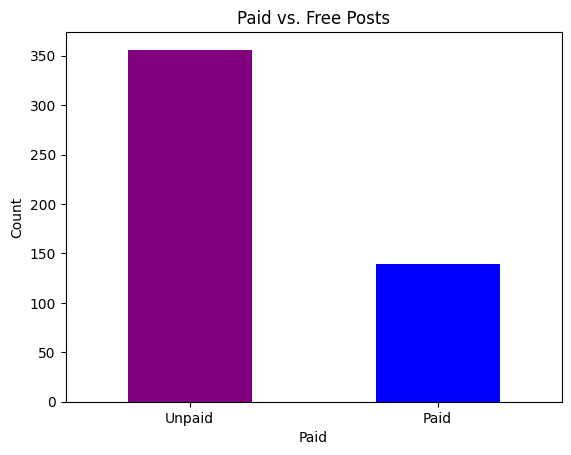

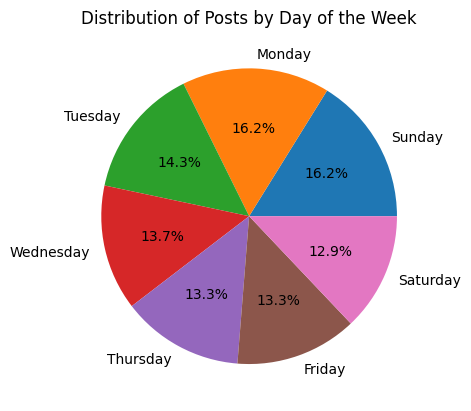

In [2]:
#Creating ar chart to compare the paid vrs Free Posts Performance
paid_counts = df['Paid'].value_counts()
paid_counts.index =['Unpaid', 'Paid']
paid_counts.plot(kind='bar', rot=0, color=['purple', 'blue'])
plt.title('Paid vs. Free Posts')
plt.xlabel('Paid')
plt.ylabel('Count')
plt.show()

##Creating  a pie chart for distribution of post per day
weekday_counts = df['Weekday.Int'].value_counts()
weekday_counts.index = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
weekday_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Posts by Day of the Week')
plt.ylabel('')
plt.show()

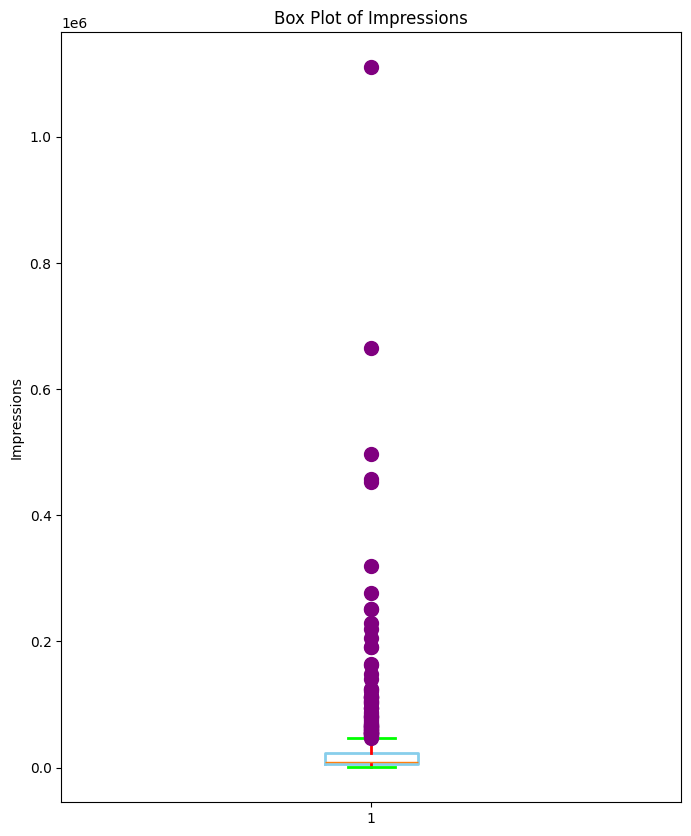

                   max    min     50%     25%      75%
Impressions  1110282.0  570.0  9084.0  5798.0  22503.0


In [3]:
# Calculate a summary of the "Impressions" variable
impressions_summary = df['Impressions'].describe()

# Selecting the specific statistics of interest (max, min, median, 25th and 75th percentiles)
specific_stats = impressions_summary[['max', 'min', '50%', '25%', '75%']]

#Creating box plot for the "Impressions" variable
plt.figure(figsize=(8, 10))
boxprops = dict(linewidth=2, color='skyblue')
whiskerprops = dict(linewidth=2, color='red')
capprops = dict(linewidth=2, color='lime')
flierprops = dict(marker='o', markerfacecolor='purple', markersize=10, markeredgecolor='purple')
plt.boxplot(df['Impressions'], vert=True, boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops)
plt.title('Box Plot of Impressions')
plt.ylabel('Impressions')
plt.show()

# Displaying statistics in a two-row table
summary_table = pd.DataFrame(specific_stats).transpose()
print(summary_table)


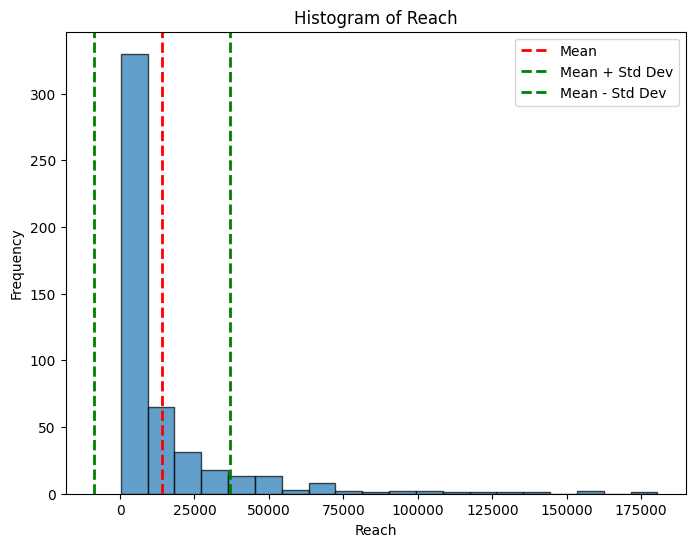

Mean of Reach: 14028.10101010101
Standard Deviation of Reach: 22821.0500080859


In [4]:

# Calculating the mean and standard deviation of the "Reach" variable
reach_mean = df['Reach'].mean()
reach_std = df['Reach'].std()

# Creating a histogram for the "Reach" variable
plt.figure(figsize=(8, 6))
plt.hist(df['Reach'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of Reach')
plt.xlabel('Reach')
plt.ylabel('Frequency')
plt.axvline(reach_mean, color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(reach_mean + reach_std, color='g', linestyle='dashed', linewidth=2, label='Mean + Std Dev')
plt.axvline(reach_mean - reach_std, color='g', linestyle='dashed', linewidth=2, label='Mean - Std Dev')
plt.legend()
plt.show()

# Display the mean and standard deviation
print("Mean of Reach:", reach_mean)
print("Standard Deviation of Reach:", reach_std)


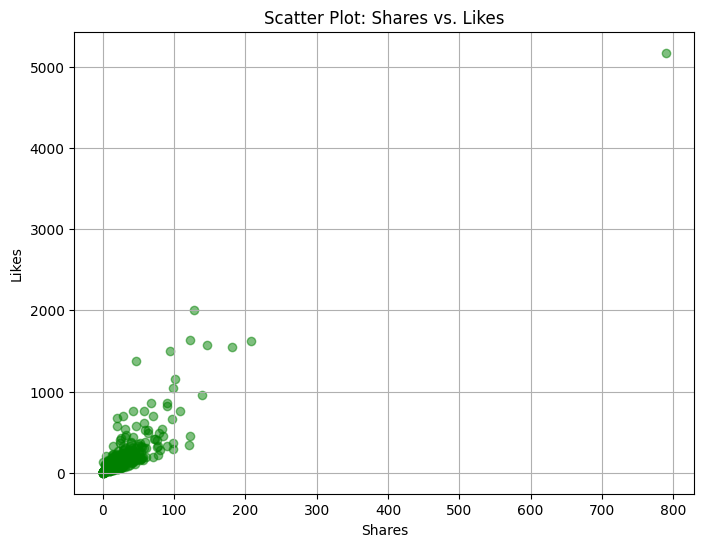

In [5]:
#Creating a scatter plot to visualize the relationship between Shares and Likes
plt.figure(figsize=(8, 6))
plt.scatter(df['Shares'], df['Likes'], alpha=0.5 ,c='Green')
plt.title('Scatter Plot: Shares vs. Likes')
plt.xlabel('Shares')
plt.ylabel('Likes')
plt.grid(True)
plt.show()


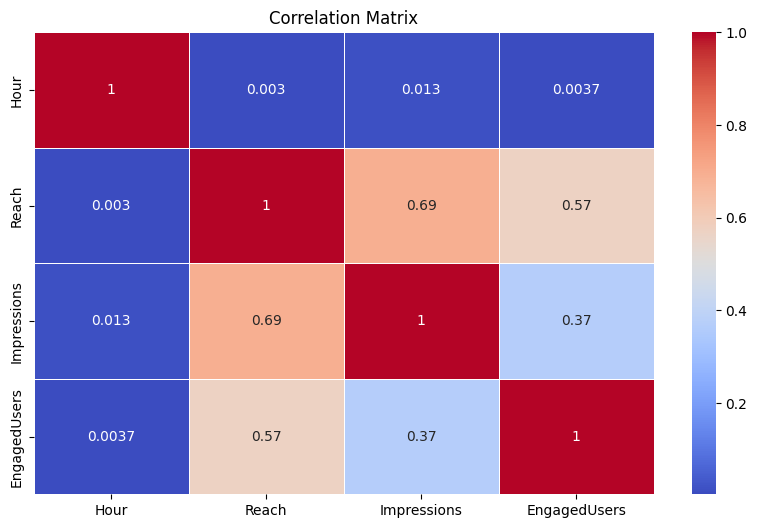

Correlation Matrix:
              Impressions  EngagedUsers     Reach
Impressions      1.000000      0.367281  0.694469
EngagedUsers     0.367281      1.000000  0.569135
Reach            0.694469      0.569135  1.000000


In [6]:
#Calculating the correlations between Hours, Reach, Impression and EngagedUsers.
correlation_matrix = df[['Hour', 'Reach', 'Impressions', 'EngagedUsers']].corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Calculating the correlation between Impression, EngagedUsers, and Reach
correlation_impression_engaged = df[['Impressions', 'EngagedUsers', 'Reach']].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_impression_engaged)

In [7]:
#Identifying the predictor among Hours, Reach, Impression and EngagedUsers which have significant impact on Shares

# Defining the independent variables (predictors)
X = df[['Hour', 'Reach', 'Impressions', 'EngagedUsers']]

# Adding a constant (intercept) to the model
X = sm.add_constant(X)

# Defining the dependent variable
y = df['Shares']

# Fitting the multiple linear regression model
model = sm.OLS(y, X).fit()

# Getting the summary of the regression model
summary = model.summary()

# Extracting p-values of the predictors
p_values = model.pvalues

# Printing the summary and p-values
print("Regression Summary:")
print(summary)
print("\nP-Values of Predictors:")
print(p_values)

# Checking the significance level (e.g., alpha = 0.05)
alpha = 0.05

# Identifying predictors with significant impact on Shares
significant_predictors = [predictor for predictor, p_value in p_values.items() if p_value < alpha]

print("\nPredictors with Significant Impact on Shares:")
for predictor in significant_predictors:
    print(predictor)

coefficients = model.params
print("\nCoefficients of Predictors:")
print(coefficients)


Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                 Shares   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     58.11
Date:                Sun, 29 Jun 2025   Prob (F-statistic):           3.90e-40
Time:                        17:56:05   Log-Likelihood:                -2463.6
No. Observations:                 495   AIC:                             4937.
Df Residuals:                     490   BIC:                             4958.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            9.7980     

In [8]:
# Defining the independent variables (predictors) including a constant
X = sm.add_constant(df[['Hour', 'Reach', 'Impressions', 'EngagedUsers', 'Weekday.Int']])

# Defining the dependent variable
y = df['Shares']

# Fitting the multiple linear regression model
model = sm.OLS(y, X).fit()

# Getting the summary of the regression model
summary = model.summary()

# Printing the regression summary
print(summary)


                            OLS Regression Results                            
Dep. Variable:                 Shares   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     46.47
Date:                Sun, 29 Jun 2025   Prob (F-statistic):           2.82e-39
Time:                        17:56:05   Log-Likelihood:                -2463.5
No. Observations:                 495   AIC:                             4939.
Df Residuals:                     489   BIC:                             4964.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           11.3657      4.785      2.375   

In [9]:
#Assessing the variance in usage hours between paid and unpaid users and computing the 97% confidence interval for the hourly difference.

# Spliting the data into paid and unpaid users
paid_users = df[df['Paid'] == 1]['Hour']
unpaid_users = df[df['Paid'] == 0]['Hour']

# Calculating the T-test
t_statistic, p_value = stats.ttest_ind(paid_users, unpaid_users)

# Calculating and print the 97% confidence interval for 'Hour' of paid users
confidence_interval_paid = stats.t.interval(0.97, loc=paid_users.mean(), scale=stats.sem(paid_users), df=len(paid_users)-1)

# Calculating and print the 97% confidence interval for 'Hour' of unpaid users
confidence_interval_unpaid = stats.t.interval(0.97, loc=unpaid_users.mean(), scale=stats.sem(unpaid_users), df=len(unpaid_users)-1)

# Printing the T-test results
print("T-Test Results:")
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Printing the 97% confidence intervals
print("\n97% Confidence Interval for Hour (Paid Users):")
print(confidence_interval_paid)

print("\n97% Confidence Interval for Hour (Unpaid Users):")
print(confidence_interval_unpaid)



T-Test Results:
T-Statistic: -1.5389039155176458
P-Value: 0.12446931389636405

97% Confidence Interval for Hour (Paid Users):
(np.float64(6.556463590442494), np.float64(8.162960869989162))

97% Confidence Interval for Hour (Unpaid Users):
(np.float64(7.525350032472059), np.float64(8.54206569786502))


In [10]:
# Conducting ANOVA analysis for Comments with respect to Weekday
comments_by_weekday = [df[df['Weekday.Int'] == level]['Comments'] for level in df['Weekday.Int'].unique()]

# Performing one-way ANOVA
f_statistic, p_value = f_oneway(*comments_by_weekday)

# Printing ANOVA results
print("One-way ANOVA Results:")
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

One-way ANOVA Results:
F-Statistic: 1.642227355201501
P-Value: 0.133551755344444


In [11]:
#Applying  nonparametric methods to examine potential differences in shares, accounting for the variable of month

# Grouping 'Shares' by 'Month.Int'
groups = [group['Shares'] for name, group in df.groupby('Month.Int')]

# Performing the Kruskal-Wallis H-test
h_statistic, p_value = kruskal(*groups)

# Printing the results
print("Kruskal-Wallis H-Test Results:")
print("H-Statistic:", h_statistic)
print("P-Value:", p_value)


Kruskal-Wallis H-Test Results:
H-Statistic: 68.4824344507671
P-Value: 2.3712720211586067e-10
